In [140]:
# group the movies into clusters based on facebook likes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
import seaborn as sns
sns.set()
from copy import deepcopy

In [141]:
url = 'https://raw.githubusercontent.com/Savinda/datasets/master/pyTutes/datasets/movie_metadata.csv'
dataset = pd.read_csv(url)
dataset.head()
dataset.shape

(5043, 28)

In [142]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [143]:
dataset['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [158]:
newdata = dataset.iloc[:,4:6].fillna(0) # mark NaN values as 0 as some directors or actors don't have facebook

In [159]:
null_columns = newdata.columns[newdata.isnull().any()]
newdata[null_columns].isnull().sum() 

Series([], dtype: float64)

In [160]:
# seems to have lot of null data in our required columns
newdata.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,0.0


In [161]:
from sklearn.cluster import KMeans

In [162]:
kmeans = KMeans(n_clusters=5) # based on SSE

In [163]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [164]:
kmeans.cluster_centers_

array([[  150.22659686,   420.43748691],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [168]:
kmeans.labels_
len(kmeans.labels_)

5043

In [169]:
type(kmeans.labels_)

numpy.ndarray

In [172]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 4775, 1: 104, 2: 87, 3: 66, 4: 11}

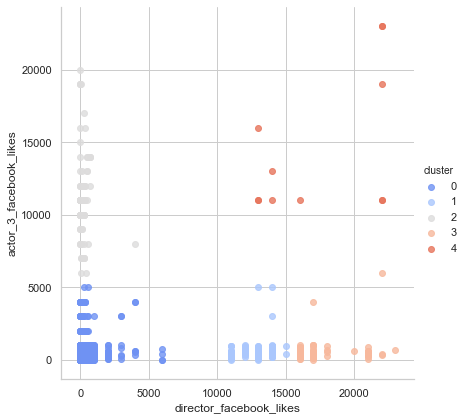

In [174]:
# plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data=newdata, hue='cluster',
          palette='coolwarm', height=6, aspect=1, fit_reg=False)
# it seems the 3rd actor is one main factor to decide movies' popularity